In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
df = pd.read_csv('salary_data_cleaned.csv')

In [126]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\r\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\r\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\r\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\r\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\r\n,NY,1,22,1,0,0,0,1


In [127]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'excel_yn'],
      dtype='object')

In [128]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principle' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

## job title and seniority

## fix state Los Angeles

## Job Description

## Competiter count

## hourly wage to annual

#remove new line from job title

In [129]:
## job title
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [130]:
df.job_simp.value_counts()

data scientist      279
na                  184
data engineer       119
analyst             102
manager              22
machine learning     22
director             14
Name: job_simp, dtype: int64

In [131]:
## seniority
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        545
senior    195
jr          2
Name: seniority, dtype: int64

In [132]:
##fix state Los Angeles
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
# df['job state']
df.job_state.value_counts()
# df.drop('job state', inplace = True, axis =1)

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
CO     11
DC     11
IN     10
UT     10
WI     10
MO      9
AZ      9
AL      8
GA      6
KY      6
MI      6
DE      6
CT      5
IA      5
LA      4
NE      4
OR      4
KS      3
NM      3
MN      2
ID      2
RI      1
SC      1
Name: job_state, dtype: int64

In [133]:
## Job Description
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
#df['desc_len']

In [134]:
## Competiter count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [135]:
## df.num_comp
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
5                      Digital Realty, CoreSite, Equinix
6                                                     -1
7                                                     -1
8                                                     -1
9                              Clicktripz, SmarterTravel
10                                                    -1
11                                                    -1
12                      Target, Costco Wholesale, Amazon
13                                                    -1
14                              Novartis, Baxter, Pfizer
15                                                    -1
16          bluebird bio, Agios Pharmaceuticals, Celgene
17                             

In [136]:
## hourly wage to annual (wage*2000 = annual wage roughly)
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [137]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [138]:
## remove new line from job title
df['company_txt']= df.company_txt.apply(lambda x: x.replace('\n',''))

In [139]:
df.company_txt

0                                    Tecolote Research\r
1                University of Maryland Medical System\r
2                                              KnowBe4\r
3                                                 PNNL\r
4                                   Affinity Solutions\r
5                                             CyrusOne\r
6                                   ClearOne Advantage\r
7                                           Logic20/20\r
8                            Rochester Regional Health\r
9                                             <intent>\r
10                                                Wish\r
11                                             ManTech\r
12                                             Walmart\r
13                                              Yesler\r
14                              Takeda Pharmaceuticals\r
15                                             Audible\r
16                                 Blueprint Medicines\r
17                             

# Till here clearing and sorting data

In [140]:
df.describe() #to get the feeling what does the data look like

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.001348,0.225067,0.237197,0.522911,3910.172507,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.036711,0.417908,0.425651,0.499812,1533.827777,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2834.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3781.500000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4772.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10146.000000,4.000000


In [141]:
# creating histograms
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

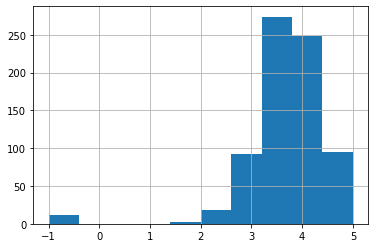

In [142]:
# histogram for rating column
df.Rating.hist()

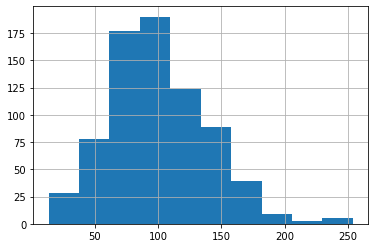

In [143]:
# ang salary histogram
df.avg_salary.hist()

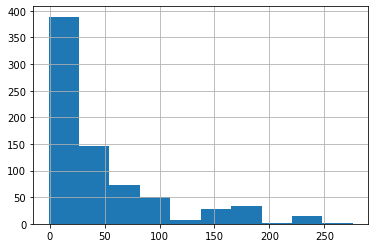

In [144]:
df.age.hist()

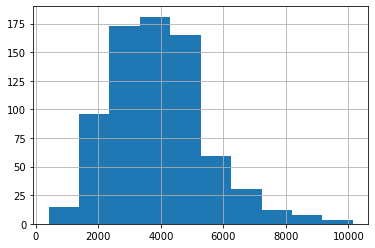

In [145]:
# job description charecters
df.desc_len.hist()

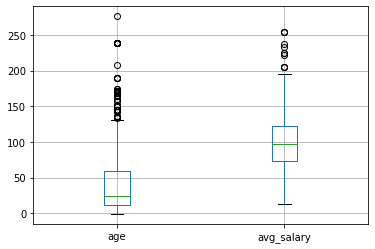

In [146]:
# boxplot for above columns
df.boxplot(column = [ 'age', 'avg_salary'])

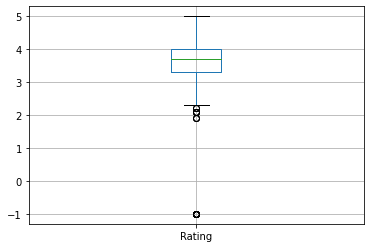

In [147]:
df.boxplot(column = [ 'Rating'])

In [148]:
# corrplot

df[['age', 'avg_salary', 'Rating', 'desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.019655,0.021655,0.165090
avg_salary,0.019655,1.000000,0.013492,0.078093
Rating,0.021655,0.013492,1.000000,-0.012631
desc_len,0.165090,0.078093,-0.012631,1.000000


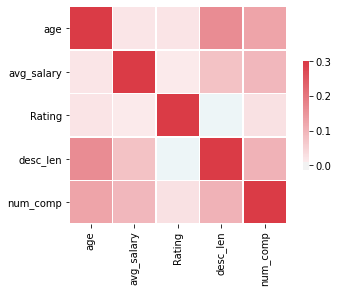

In [149]:
# corrplot heatmap

cmap = sns.diverging_palette(220, 10, as_cmap=True)  # Generate a custom diverging colormap
sns.heatmap(df[['age', 'avg_salary', 'Rating', 'desc_len', 'num_comp']].corr(), cmap = cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [150]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [151]:
# categories which are most needed to sort
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state', 'same_state', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority']]

graph for Location: total = 200


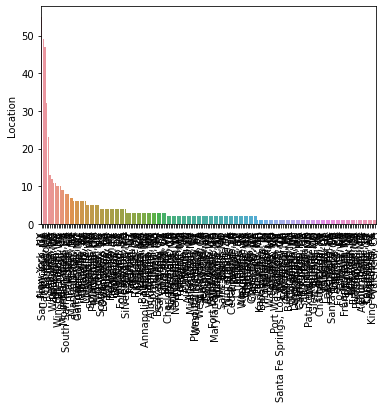

graph for Headquarters: total = 198


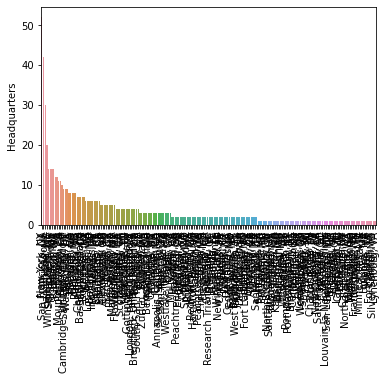

graph for Size: total = 9


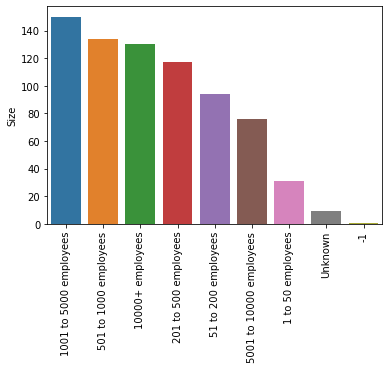

graph for Type of ownership: total = 11


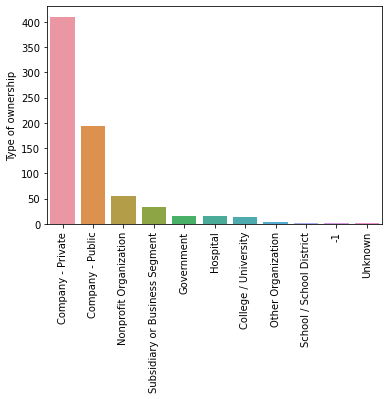

graph for Industry: total = 60


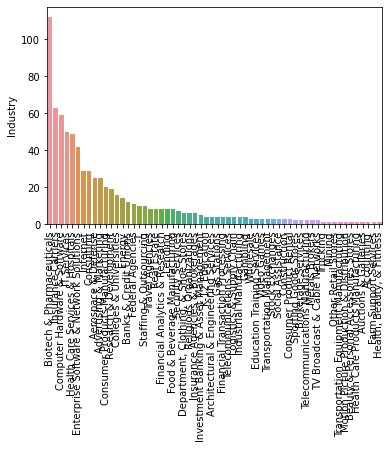

graph for Sector: total = 25


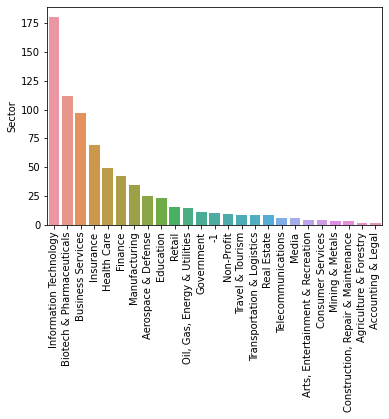

graph for Revenue: total = 14


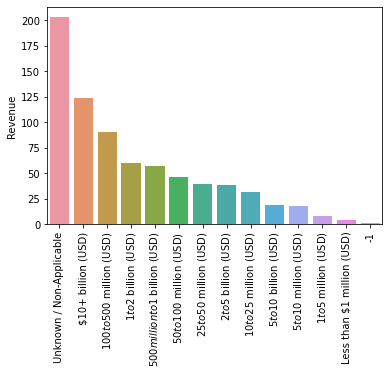

graph for company_txt: total = 343


C:\Users\KIIT\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KIIT\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


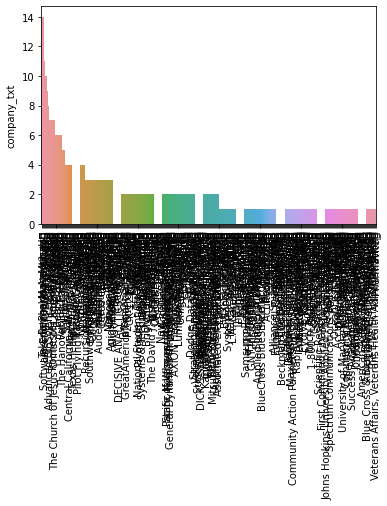

graph for job_state: total = 37


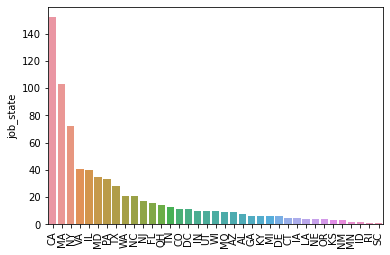

graph for same_state: total = 2


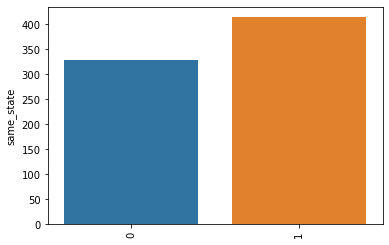

graph for python_yn: total = 2


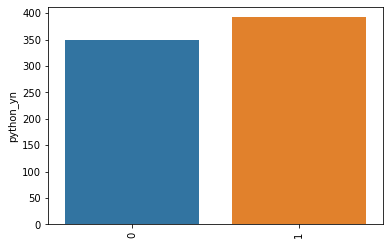

graph for R_yn: total = 2


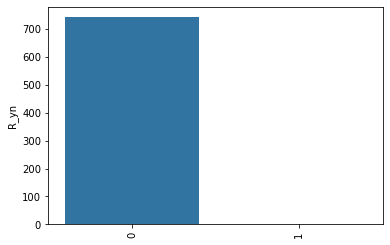

graph for spark_yn: total = 2


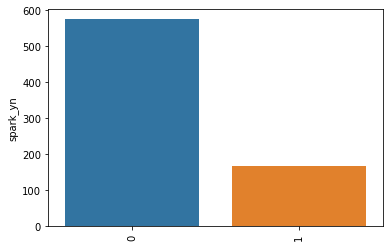

graph for aws_yn: total = 2


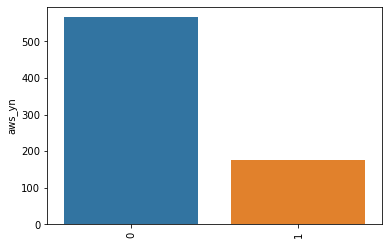

graph for excel_yn: total = 2


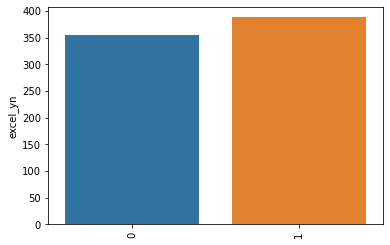

graph for job_simp: total = 7


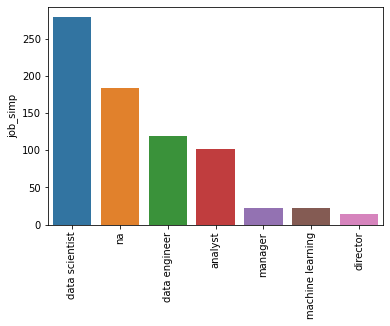

graph for seniority: total = 3


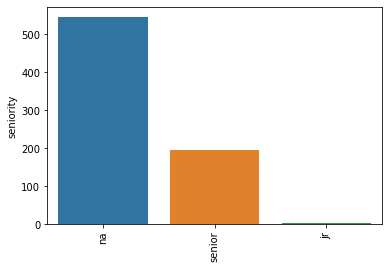

In [152]:
# graph for all columns individually on the basis of total values
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num) # taking values for barplot
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90) # rotating x labels for better view
    plt.show() # showing plot

graph for Location: total = 20


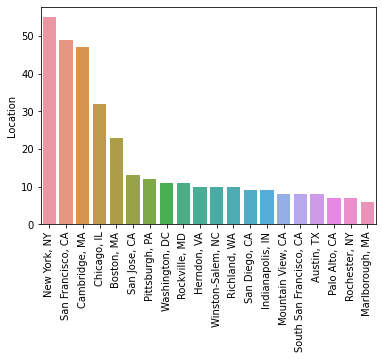

graph for Headquarters: total = 20


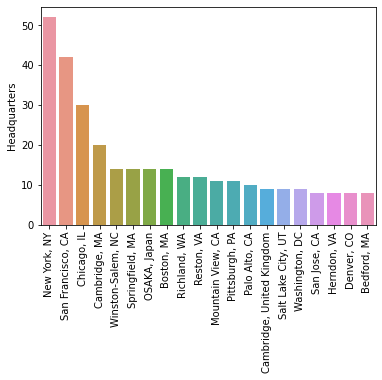

graph for company_txt: total = 20


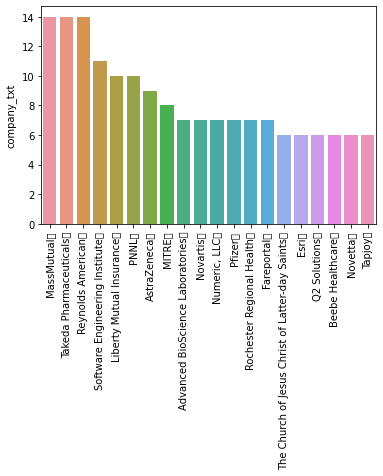

In [153]:
# looking atlong graphs with more values more carefully 
#(for selected columns) & :20--> for only top 20 values
for i in df_cat[['Location', 'Headquarters', 'company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num) 
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

In [154]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [155]:
#pivot table
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
machine learning,126.431818
manager,84.022727
na,84.853261


In [156]:
# table compairing salaries for different job positions along with the seniority
pd.pivot_table(df, index = ['job_simp', 'seniority'], values = 'avg_salary')

avg_salary
job_simp         seniority            
analyst          jr          56.500000
                 na          61.155405
                 senior      79.092593
data engineer    na          97.493976
                 senior     123.638889
data scientist   jr         106.500000
                 na         110.525510
                 senior     134.524390
director         na         168.607143
machine learning na         126.218750
                 senior     127.000000
manager          na          84.022727
na               na          76.885714
                 senior     110.204545

In [157]:
pd.set_option('display.max_rows', None)

In [158]:
pd.pivot_table(df, index = ['job_state', 'job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)
#.sort_values('avg_salary', ascending = False), count --> total jobs for that position

avg_salary
job_state job_simp                    
WI        na                         4
          data scientist             3
          analyst                    3
WA        na                         1
          data scientist            17
          analyst                    3
VA        na                         5
          machine learning           2
          data scientist            18
          data engineer             10
          analyst                    6
UT        data engineer              3
          analyst                    4
          data scientist             3
TX        na                         7
          data scientist            13
          data engineer              8
TN        data scientist             1
          data engineer             10
          analyst                    2
SC        na                         1
RI        analyst                    1
PA        machine learning           7
          data engineer              1
          data scientist             6
          analyst                    8
          manager                    3
          na                         8
OR        data scientist             3
          data engineer              1
OH        na                         3
          data scientist             7
          analyst                    4
NY        na                        12
          machine learning           2
          data scientist            40
          data engineer              4
          analyst                   14
NM        data scientist             3
NJ        data scientist             4
          analyst                    6
          data engineer              2
          manager                    2
          director                   2
          na                         1
NE        na                         4
NC        na                        12
          data scientist             3
          data engineer              6
MO        na                         3
          manager                    1
          data scientist             3
          analyst                    2
MN        data engineer              1
          analyst                    1
MI        manager                    2
          data scientist             4
MD        na                        16
          data scientist            13
          data engineer              3
          analyst                    3
MA        na                        46
          manager                    5
          director                   6
          data scientist            30
          data engineer             12
          analyst                    4
LA        analyst                    1
          data engineer              2
          na                         1
KY        na                         4
          data scientist             2
KS        machine learning           3
IN        na                         4
          data scientist             2
          data engineer              4
IL        analyst                    3
          na                         6
          machine learning           2
          director                   6
          data scientist            15
          data engineer              8
ID        analyst                    2
IA        analyst                    2
          data engineer              3
GA        data scientist             3
          na                         3
FL        data scientist             7
          data engineer              3
          analyst                    6
DE        na                         6
DC        data scientist             5
          data engineer              4
          analyst                    2
CT        na                         3
          data scientist             2
CO        machine learning           1
          data engineer              3
          analyst                    1
          na                         3
          data scientist             3
CA        n

In [159]:
# here, sorting using data scientist position and in a particula state and soring basis of avg salary
pd.pivot_table(df[df.job_simp == 'data scientist'], index = ['job_state', 'job_simp'], values = 'avg_salary').sort_values('avg_salary', ascending = False)
# no aggfunc = count, as by definition it usually uses the avg so no need of it

,,avg_salary
job_state,job_simp,
DC,data scientist,149.000000
CA,data scientist,142.522059
UT,data scientist,140.500000
MO,data scientist,127.666667
IL,data scientist,117.233333
NC,data scientist,117.000000
NY,data scientist,115.250000
MA,data scientist,113.750000
WI,data scientist,113.500000


In [160]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [161]:
#rating, industry, sector, revenue, number of comp, hourly
# employer provider, python,r spark, excel, desc_len, type of ownership

In [162]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'desc_len', 'Type of ownership', 'avg_salary']]

In [163]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [164]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


# Making a word cloud to know the most common words used in the job description when talking about candidates

In [165]:
!pip install wordcloud

In [166]:
# these values to be installed seperatly
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')

In [167]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

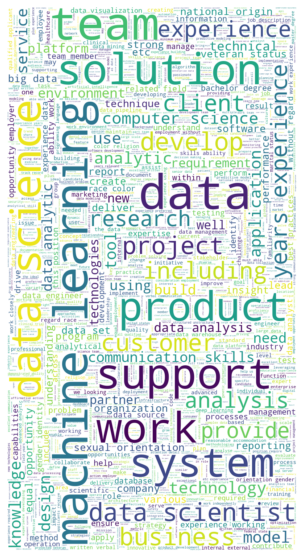

In [168]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear") #actual word cloud to be passed
plt.axis('off')
plt.show()

In [169]:
df.to_csv('eda_data.csv')